In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [13]:
df = pd.read_csv("new_churn_data.csv")

df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID
0,1,NaN,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000,1
1,34,NaN,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140,2
2,2,NaN,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920,3
3,45,NaN,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980,4
4,2,NaN,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205,5
...,...,...,...,...,...,...,...,...,...,...,...
7027,24,NaN,One year,Mailed check,84.80,1990.50,0,4.440296,82.937500,0.042602,7028
7028,72,NaN,One year,Credit card (automatic),103.20,7362.90,0,4.636669,102.262500,0.014016,7029
7029,11,NaN,Month-to-month,Electronic check,29.60,346.45,0,3.387774,31.495455,0.085438,7030
7030,4,NaN,Month-to-month,Mailed check,74.40,306.60,1,4.309456,76.650000,0.242661,7031


In [14]:
df.drop(columns=['PhoneService'], inplace=True)
df.head()

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID
0,1,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000,1
1,34,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140,2
2,2,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920,3
3,45,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980,4
4,2,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205,5


## Generate dummies and convert to numeric

In [15]:
payment_method_dummies = pd.get_dummies(df['PaymentMethod'])
contract_dummies = pd.get_dummies(df['Contract'])

df = pd.concat([df, payment_method_dummies, contract_dummies], axis=1)
df.head()

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,Month-to-month,Electronic check,29.85,29.85,0,3.396185,29.850000,1.000000,1,False,False,True,False,True,False,False
1,34,One year,Mailed check,56.95,1889.50,0,4.042174,55.573529,0.030140,2,False,False,False,True,False,True,False
2,2,Month-to-month,Mailed check,53.85,108.15,1,3.986202,54.075000,0.497920,3,False,False,False,True,True,False,False
3,45,One year,Bank transfer (automatic),42.30,1840.75,0,3.744787,40.905556,0.022980,4,True,False,False,False,False,True,False
4,2,Month-to-month,Electronic check,70.70,151.65,1,4.258446,75.825000,0.466205,5,False,False,True,False,True,False,False


In [16]:
df.drop(columns=['PaymentMethod', 'Contract'], inplace=True)
df

,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,29.85,29.85,0,3.396185,29.850000,1.000000,1,False,False,True,False,True,False,False
1,34,56.95,1889.50,0,4.042174,55.573529,0.030140,2,False,False,False,True,False,True,False
2,2,53.85,108.15,1,3.986202,54.075000,0.497920,3,False,False,False,True,True,False,False
3,45,42.30,1840.75,0,3.744787,40.905556,0.022980,4,True,False,False,False,False,True,False
4,2,70.70,151.65,1,4.258446,75.825000,0.466205,5,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,0,4.440296,82.937500,0.042602,7028,False,False,False,True,False,True,False
7028,72,103.20,7362.90,0,4.636669,102.262500,0.014016,7029,False,True,False,False,False,True,False
7029,11,29.60,346.45,0,3.387774,31.495455,0.085438,7030,False,False,True,False,True,False,False
7030,4,74.40,306.60,1,4.309456,76.650000,0.242661,7031,False,False,False,True,True,False,False


In [17]:
dummy_columns = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Month-to-month', 'One year', 'Two year']

for column in dummy_columns:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,tenure,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
2606,10,70.30,738.20,1,4.252772,73.820000,0.095232,2607,0,0,0,0,0,0,0
4054,14,50.10,709.50,0,3.914021,50.678571,0.070613,4055,1,0,1,0,0,0,0
6461,8,43.45,345.50,0,3.771611,43.187500,0.125760,6462,0,0,1,1,1,1,0
5114,27,49.85,1336.15,0,3.909018,49.487037,0.037309,5115,0,0,1,1,0,0,0
4381,30,100.40,2936.25,0,4.609162,97.875000,0.034193,4382,1,0,1,0,0,0,0


## Check for missing values

In [18]:
df.isna().sum()

tenure                                  0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
MonthlyCharges_log                      0
TotalCharges_Tenure_Ratio               0
MonthlyCharges_to_TotalCharges_Ratio    0
customerID                              0
Bank transfer (automatic)               0
Credit card (automatic)                 0
Electronic check                        0
Mailed check                            0
Month-to-month                          0
One year                                0
Two year                                0
dtype: int64

## Data Modellling

### Split data into features(X) and targets (y)

In [20]:
features = df.drop('Churn', axis=1)
targets = df['Churn']


In [21]:
X = features
y = targets

In [23]:
X.sample(6)

,tenure,MonthlyCharges,TotalCharges,MonthlyCharges_log,TotalCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,customerID,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
392,2,44.30,89.30,3.790985,44.650000,0.496081,393,0,0,0,0,0,0,0
5075,40,71.35,2847.20,4.267597,71.180000,0.025060,5076,0,0,1,1,0,0,0
3175,3,20.00,63.60,2.995732,21.200000,0.314465,3176,0,0,1,1,0,0,0
6287,31,50.40,1580.10,3.919991,50.970968,0.031897,6288,0,1,1,0,1,1,0
1145,13,96.65,1162.85,4.571096,89.450000,0.083115,1146,0,0,1,1,0,0,0
5232,55,64.20,3627.30,4.162003,65.950909,0.017699,5233,0,0,0,0,1,1,0


## Split data into training and testing sets

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
X_train.shape 

(5625, 14)

In [26]:
X_test.shape 

(1407, 14)

In [27]:
y_train.shape 

(5625,)

In [28]:
y_test.shape

(1407,)

## Fit model into training data

In [29]:

rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

The output indicates that the RandomForestClassifier object has been created with random_state=42. This parameter is used to set the random seed for reproducibility. 

In [30]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

The frequency of each unique value in the Churn column of the df is calculated. Setting normalize=True returns the relative frequencies proportions instead of raw counts. 
The proportion of the two unique values are as,

    Yes: 0.265785
    No : 0.734215


In [31]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))


1.0
0.7718550106609808


The accuracy score on the training set is 1.0, which means the model predicts all training data points correctly. This could suggest that the model might be overfitting the training data.

The accuracy score on the test set is approximately 0.772, indicating that the model performs less accurately on test data compared to the training data. This discrepancy suggests that the model might not generalize well to new data points, supporting the suspicion of overfitting.

## Evaluate performance on the training set

In [32]:

train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 1.0


## Evaluate performance on the test set

In [33]:

test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')


Test Accuracy: 0.7718550106609808


## Comparison with No information rate

In [34]:

no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')


No Information Rate: 0.7342222222222222


**Training Accuracy (1.0)**
    
This indicates that the model achieved perfect accuracy on the training data, correctly predicting all churn outcomes. This might suggest a potential risk of overfitting, where the model may have memorized the training data too well, making it less generalizable to unseen data.

**Test Accuracy (0.772)**

The model's accuracy on the test data is approximately 77.2%, meaning it correctly predicted churn outcomes for about 77.2% of the customers in the test set. This performance is slightly better than random chance, but it's not exceptional. It suggests that the model is moderately effective in predicting churn based on the given features.

**No-Information Rate (0.734)**

This rate serves as a baseline metric, indicating the accuracy achieved by always predicting the majority class (i.e., No churn). 

## Plot confusion matrix

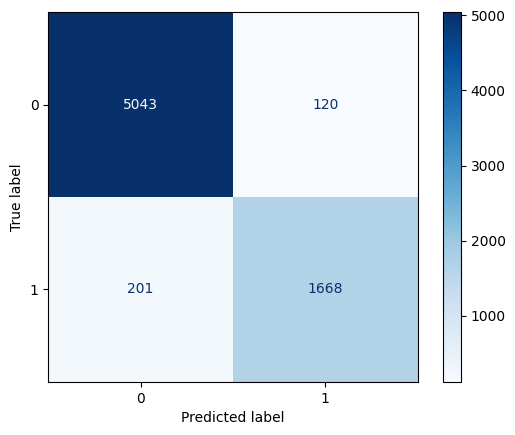

In [40]:

# Combine train and test predictions
predictions = np.concatenate((train_predictions, test_predictions))

# Combine train and test true labels
y_true = pd.concat([y_train, y_test])

# Calculate confusion matrix
cm = confusion_matrix(y_true, predictions, labels=rf_model.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

By combining the predictions and the targets, we calculate the confusion matrix based on all the predictions made by the model, whether they are from the training set or the test set. This provides a comprehensive view of the model's performance across the entire dataset, allowing us to better assess its overall effectiveness in making predictions.

True negatives (TN): 5043 instances where the true label is 0 (no churn) are correctly predicted. This signifies the number of customers who were correctly identified as not churning.

False negatives (FN): The model incorrectly predicted 0 (no churn) when the true label is 1 (churn) in 201 instances. This signifies the number of customers who were incorrectly identified as not churning, leading to missed opportunities for intervention. These are customers who churned despite the model predicting otherwise.

True positives (TP): The model correctly predicted 1668 instances where the true label is 1 (churn). This signifies the number of customers who were correctly identified as churning. These are customers who actually churned, and the model successfully flagged them for attention or intervention.

False positives (FP): The model incorrectly predicted 1 (churn) when the true label is 0 (no churn) in 120 instances. This signifies the number of customers who were incorrectly identified as churning, leading to unnecessary intervention or resources being allocated to customers who were not at risk of churning.


## Model Tuning

In [42]:
rf_model.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.82, 0.18],
       [0.38, 0.62],
       ...,
       [0.97, 0.03],
       [0.75, 0.25],
       [1.  , 0.  ]])

The first column represents the probability that the sample belongs to class 0 (no churn). The model is very confident that it belongs to class 0 (no churn) because it assigns a probability of 1.0 to class 0 and 0.0 to class 1

The second column represents the probability that the sample belongs to class 1 (churn). The model predicts a probability of 0.82 for class 0 and 0.18 for class 1, suggesting that the sample is more likely to belong to class 0 but with less certainty compared to the first sample.


In [43]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

# Print the best hyperparameters

In [44]:
print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


## Evaluate performance on the test set using the best model

In [45]:

best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)


## Print accuracy and other metrics

In [46]:

test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')


Test Accuracy: 0.783226723525231


In [47]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7342222222222222


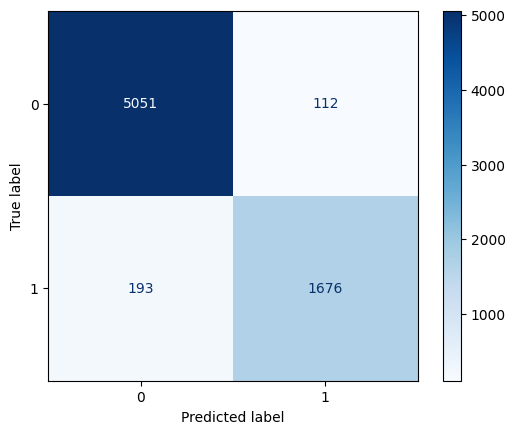

In [48]:
# Combine train and test predictions
predictions = np.concatenate((train_predictions, test_predictions))

# Combine train and test true labels
y_true = pd.concat([y_train, y_test])

# Calculate confusion matrix
cm = confusion_matrix(y_true, predictions, labels=rf_model.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The output suggests that the tuned RandomForestClassifier has achieved a test accuracy of approximately 78.32%, and this performance is better than predicting the majority class based on the no information rate of approximately 73.42%.

## Feature imporatnces for RFC

In [53]:
feature_importances = rf_model.feature_importances_
feature_importances


array([0.09565127, 0.1276828 , 0.11934591, 0.12266915, 0.12452515,
       0.13594701, 0.11683536, 0.00802883, 0.00797538, 0.02915635,
       0.00866748, 0.0726516 , 0.01151357, 0.01935016])

Each number in the array corresponds to the importance of a specific feature.

The values represent the proportion of impurity reduction that each feature contributes to the model.

Higher values indicate features that are more influential in making predictions.

## DataFrame to display feature importances

In [55]:

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df.head(5)


,Feature,Importance
0,tenure,0.095651
1,MonthlyCharges,0.127683
2,TotalCharges,0.119346
3,MonthlyCharges_log,0.122669
4,TotalCharges_Tenure_Ratio,0.124525



Significant features include MonthlyCharges (0.127683), TotalCharges_Tenure_Ratio (0.124525), TotalCharges (0.119346), and MonthlyCharges_log (0.122669).

Features with lower importances, such as Bank transfer (automatic), and Credit card (automatic), contribute less to the model's predictive capability.

In [56]:
# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)

## Bar chart to visualize feature importances

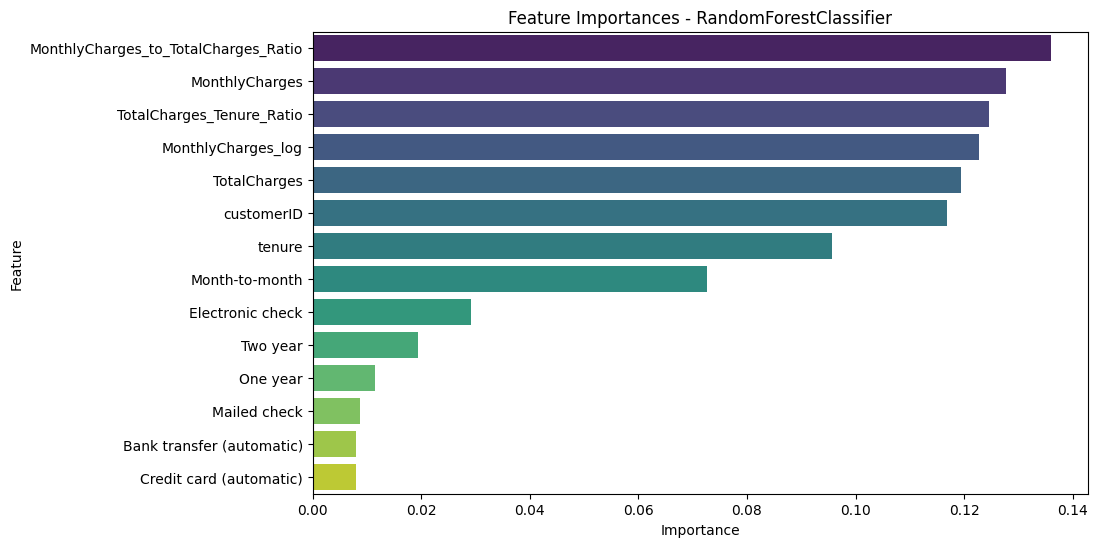

In [58]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances - RandomForestClassifier')
plt.show()

**Interpretation**

The graph provides a visual representation of the importance of each feature in descending order.

It helps in identifying which features have the most influence on the model's predictions.

Features with taller bars like MonthlyCharges, MonthlyCharges_log, TotalCharges_to_Tenure_ratio e.t.c., have higher importances and contribute more to the model's decision-making.

## ROC Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x800 with 0 Axes>

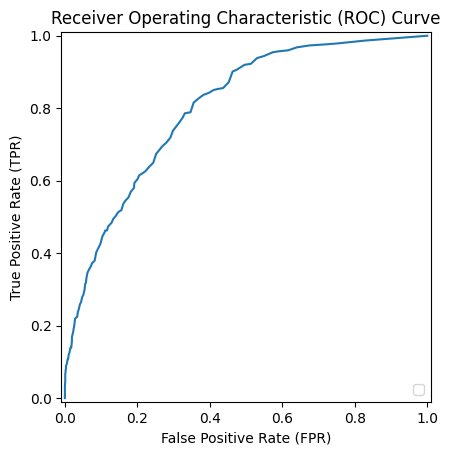

In [60]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Make predictions on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()


The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across different threshold values. 

**True Positive Rate (TPR) / Sensitivity** 

This is the y-axis. It represents the proportion of actual positive instances (churn cases) correctly predicted by the model.

**False Positive Rate (FPR) / 1 - Specificity**

This is the x-axis. It represents the proportion of actual negative instances incorrectly predicted as positive by the model.

**Interpretation**

**Curve Shape**

The curve is generally upward-sloping, indicating that as the true positive rate increases, there is a corresponding increase in the false positive rate.


**Thresholds**

The curve represents different classification thresholds for the model. It shows how the TPR and FPR change as the decision threshold is varied.

In [61]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.59      0.46      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



**Classification Report** 

Precision: Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.59 for class 1 suggests that among all instances predicted as churn (positive cases), approximately 59% are actually churned customers.

Recall: Recall, also known as sensitivity, measures the proportion of actual positive cases that were correctly identified by the model. A recall of 0.46 for class 1 indicates that the model correctly identified approximately 46% of all churned customers.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. A higher F1-score indicates better balance between precision and recall.

Accuracy: Accuracy represents the overall correctness of the model's predictions, regardless of class. An accuracy of 0.77 indicates that approximately 77% of all predictions made by the model on the test set are correct.

# Deployment

## Microservice Architecture

Deploying the model as a microservice within a microservices architecture offers several benefits. 
It enables the model to be containerized, facilitating independent deployment and scalability. This approach aligns with the principles of modularity and flexibility promoted by microservices architecture, allowing the model to seamlessly integrate into the existing customer management system without disrupting other functionalities. 

Additionally, containerization provides isolation, ensuring that any changes or updates to the model can be made independently of the larger system, enhancing maintainability and reliability.

## Application

It can be deployed in the business to automate the identification of customers at a high risk of churning. 

By integrating it into the business's customer management system, it can provide real-time predictions. 

The business can use these predictions to trigger targeted and personalized interventions, such as special offers, proactive customer support, or tailored communication. This approach enables the business to address potential churners, optimize resource allocation, and foster stronger customer retention strategies.
